Plot the velocity with respect to the distance to the front.

In [2]:
import alborexdata
import alborexpaths
import netCDF4
import os
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap 
import numpy as np
import datetime
import cmocean
from geopy.distance import vincenty
from importlib import reload

importing configuration from alborexpaths


In [3]:
f = alborexdata.Front()
f.get_from_file(alborexpaths.frontfile)
f.smooth()

## Make the plot

In [6]:
nfiles = len(alborexpaths.drifterfiles)

1/25
2/25
3/25
4/25
5/25


/home/ctroupin/Publis/AlborEx-Data-Python/python/alborexdata.py:267: RuntimeWarning: divide by zero encountered in true_divide
  self.velocity = distancevec / timevec
/home/ctroupin/Publis/AlborEx-Data-Python/python/alborexdata.py:267: RuntimeWarning: invalid value encountered in true_divide
  self.velocity = distancevec / timevec


6/25
7/25
8/25
9/25
10/25
11/25
12/25
13/25
14/25
15/25
16/25
17/25
18/25
19/25
20/25
21/25
22/25
23/25
24/25
25/25


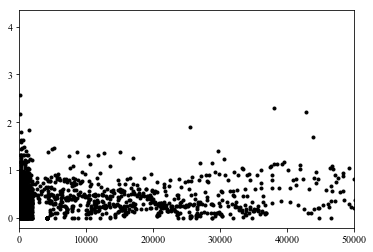

In [7]:
ii = 0
plt.figure()
for drifterfile in alborexpaths.drifterfiles:
    ii += 1
    print(str(ii) + "/" + str(nfiles))
    d = alborexdata.Drifter()
    d.get_from_netcdf(drifterfile)
    # Apply quality flags
    d.apply_qc_latlon(QC=[1])
    # Select mission period
    d.select_dates(finaldate=datetime.datetime(2014, 6, 1, 0, 0))
    d.get_distance_front(f.lon, f.lat)
    d.compute_velocity(velmax=5.)
    plt.plot(d.distance2front[:-1], d.velocity, "k.")
plt.xlim(0, 50000)
plt.show()
plt.close()